# **Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Paths to dataset

base_path = '/content/drive/MyDrive/Colab Notebooks/Research project/models/Malaria data'
infected_folder = os.path.join(base_path, 'infected')
uninfected_folder = os.path.join(base_path, 'uninfected')

In [ ]:
# Train, validation, and test folders

train_folder = os.path.join(base_path, 'train')
validation_folder = os.path.join(base_path, 'validation')
test_folder = os.path.join(base_path, 'test')

In [ ]:
# Train, validation, and test subfolders for infected and uninfected

os.makedirs(os.path.join(train_folder, 'infected'), exist_ok=True)
os.makedirs(os.path.join(train_folder, 'uninfected'), exist_ok=True)
os.makedirs(os.path.join(validation_folder, 'infected'), exist_ok=True)
os.makedirs(os.path.join(validation_folder, 'uninfected'), exist_ok=True)
os.makedirs(os.path.join(test_folder, 'infected'), exist_ok=True)
os.makedirs(os.path.join(test_folder, 'uninfected'), exist_ok=True)

# *Split data function (run once)*

In [ ]:
# Helper function to split data

def split_data(source, training, validation, testing, split_size):
    files = os.listdir(source)
    np.random.shuffle(files)
    train_files = files[:int(len(files)*split_size[0])]
    validation_files = files[int(len(files)*split_size[0]):int(len(files)*split_size[0])+int(len(files)*split_size[1])]
    test_files = files[int(len(files)*split_size[0])+int(len(files)*split_size[1]):]

    for file in train_files:
        src = os.path.join(source, file)
        dst = os.path.join(training, file)
        os.rename(src, dst)

    for file in validation_files:
        src = os.path.join(source, file)
        dst = os.path.join(validation, file)
        os.rename(src, dst)

    for file in test_files:
        src = os.path.join(source, file)
        dst = os.path.join(testing, file)
        os.rename(src, dst)

In [ ]:
# Split data into train, validation, and test sets

split_size = [0.7, 0.15, 0.15]
split_data(infected_folder, os.path.join(train_folder, 'infected'), os.path.join(validation_folder, 'infected'), os.path.join(test_folder, 'infected'), split_size)
split_data(uninfected_folder, os.path.join(train_folder, 'uninfected'), os.path.join(validation_folder, 'uninfected'), os.path.join(test_folder, 'uninfected'), split_size)


# **Verification of Image files**

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# helper funtion to count images

def count_image_files(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tif', '.tiff']
    total_images = 0

    for root, _, files in os.walk(folder_path):
        for file in files:
            _, ext = os.path.splitext(file)
            if ext.lower() in image_extensions:
                total_images += 1

    return total_images

In [ ]:
print('Training images:', count_image_files('/content/drive/MyDrive/Colab Notebooks/Research project/models/Malaria data/train'))

Training images: 2105


In [ ]:
print('Validation images:', count_image_files('/content/drive/MyDrive/Colab Notebooks/Research project/models/Malaria data/validation'))

Validation images: 451


In [ ]:
print('Testing images:', count_image_files('/content/drive/MyDrive/Colab Notebooks/Research project/models/Malaria data/test'))

Testing images: 453


In [ ]:
# Paths to class subfolders

infected_train_folder = os.path.join(train_folder, 'infected')
uninfected_train_folder = os.path.join(train_folder, 'uninfected')

In [ ]:
# list of filenames for infected and uninfected

infected_filenames = os.listdir(infected_train_folder)
uninfected_filenames = os.listdir(uninfected_train_folder)

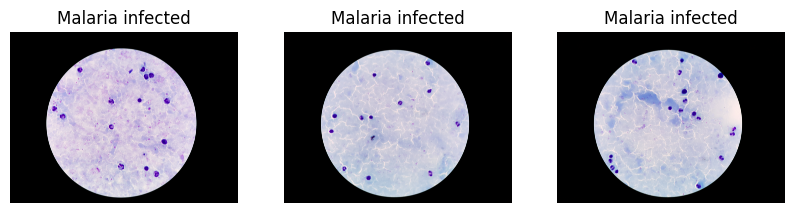

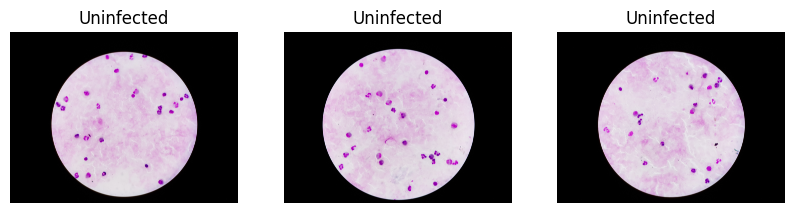

In [ ]:
# Display a few infected images

plt.figure(figsize=(10, 5))
for i, img_filename in enumerate(infected_filenames[10:13]):
    img_path = os.path.join(infected_train_folder, img_filename)
    image = plt.imread(img_path)
    plt.subplot(1, 3, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Malaria infected')
plt.show()

# Display a few uninfected images

plt.figure(figsize=(10, 5))
for i, img_filename in enumerate(uninfected_filenames[5:8]):
    img_path = os.path.join(uninfected_train_folder, img_filename)
    image = plt.imread(img_path)
    plt.subplot(1, 3, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Uninfected')
plt.show()

# **Data Preprocessing**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_folder,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_folder,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:202: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


Found 2105 images belonging to 2 classes.
Found 451 images belonging to 2 classes.


In [ ]:
# test generator

test_generator = test_datagen.flow_from_directory(test_folder,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 453 images belonging to 2 classes.


In [ ]:
# Generator output

for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# **Model Development and Training**

In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [ ]:
# Fit the model

history = model.fit(train_generator,
                    steps_per_epoch=2105//20,
                    epochs=25,
                    validation_data=validation_generator,
                    validation_steps=451//20)

Epoch 1/25
105/105 [==============================] - 922s 9s/step - loss: 0.6532 - acc: 0.6230 - val_loss: 0.5818 - val_acc: 0.6636
Epoch 2/25
105/105 [==============================] - 241s 2s/step - loss: 0.5258 - acc: 0.7233 - val_loss: 0.4606 - val_acc: 0.7750
Epoch 3/25
105/105 [==============================] - 243s 2s/step - loss: 0.4562 - acc: 0.7640 - val_loss: 0.4544 - val_acc: 0.7250
Epoch 4/25
105/105 [==============================] - 238s 2s/step - loss: 0.3965 - acc: 0.8158 - val_loss: 0.4757 - val_acc: 0.7477
Epoch 5/25
105/105 [==============================] - 234s 2s/step - loss: 0.3445 - acc: 0.8432 - val_loss: 0.3467 - val_acc: 0.8318
Epoch 6/25
105/105 [==============================] - 234s 2s/step - loss: 0.2878 - acc: 0.8835 - val_loss: 0.3001 - val_acc: 0.8409
Epoch 7/25
105/105 [==============================] - 232s 2s/step - loss: 0.2277 - acc: 0.9012 - val_loss: 0.2774 - val_acc: 0.8591
Epoch 8/25
105/105 [==============================] - 235s 2s/step - 

In [ ]:
import pickle

In [ ]:
save_dir = '/content/drive/MyDrive/Colab Notebooks/Research project/models'

In [ ]:
# Save the model and training history

model.save(save_dir + 'model_up_to_epoch_5_2.h5')
with open('training_history_up_to_epoch_5.pkl', 'wb') as f:
    pickle.dump(history.history, f)


# **Results**

In [ ]:
import os
import shutil
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

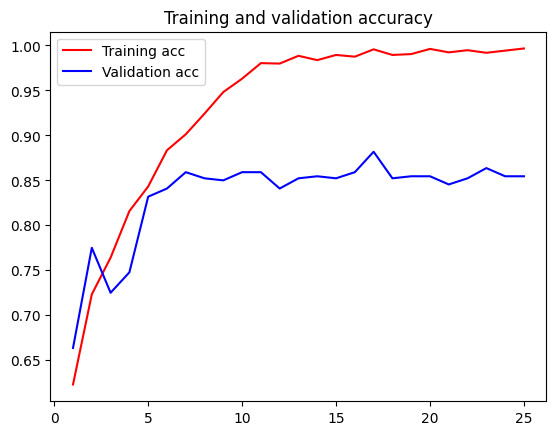

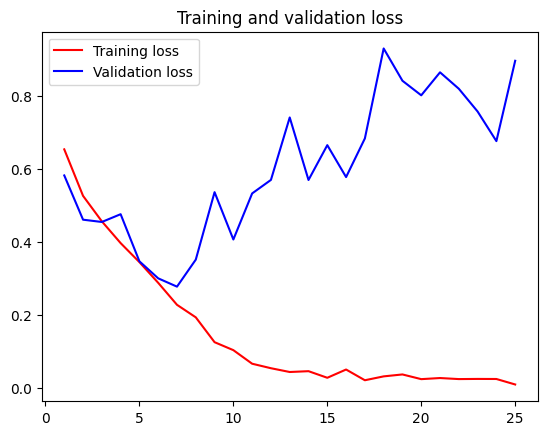

In [ ]:
# Loss and accuracy curves during training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig(save_dir + 'accuracy_training25.png', dpi=300, bbox_inches='tight')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(save_dir + 'loss_training25.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Test results

test_loss, test_acc = model.evaluate(test_generator, steps=453//20)
print('test acc:', test_acc)
print('test loss:', test_loss)

22/22 [==============================] - 204s 10s/step - loss: 0.9012 - acc: 0.8591
test acc: 0.8590909242630005


In [ ]:
def prediction(pred):
  predicted_class_index = 1 if pred >= 0.5 else 0

  return predicted_class_index


In [ ]:
data_dir1 = '/content/drive/MyDrive/Colab Notebooks/Research project/models/Malaria data/test'

In [ ]:

def get_images(data_dir):
  class_names = os.listdir(data_dir)

  images = []
  labels = []

# Get images from directory
  for class_name in class_names:
      class_dir = os.path.join(data_dir, class_name)
      for image_name in os.listdir(class_dir):
          image_path = os.path.join(class_dir, image_name)
          img = cv2.imread(image_path)
          img = cv2.resize(img, (150, 150))
          img = img / 255.0
          images.append(img)
          labels.append(class_name)
  return images, labels

In [ ]:
images1, labels1 = get_images(data_dir1)

In [ ]:
len(images1) , len(labels1)

(453, 453)

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels1)

In [ ]:
# split training and test data

x_train1, x_test1, y_train1, y_test1 = train_test_split(images1, y, test_size=0.99, random_state=None)

In [ ]:

x_train1 = np.array(x_train1)  # Convert the list to a NumPy array
x_test1 = np.array(x_test1)  # Convert the list to a NumPy array

# Reshape the arrays to (1, 150, 150, 3)
x_train1 = x_train1.reshape(-1, 150, 150, 3)
x_test1 = x_test1.reshape(-1, 150, 150, 3)


In [ ]:
y_pred = model.predict(x_test1)

15/15 [==============================] - 1s 41ms/step


In [ ]:
y_pred = (y_pred >= 0.5).astype(int)

In [ ]:
y_pred = y_pred.reshape(-1)

In [ ]:
y_pred.shape

(449,)

In [ ]:

# Calculate confusion matrix.
conf_matrix = confusion_matrix(y_test1, y_pred)

# Calculate classification report for precision, recall, and F1-score.
class_report = classification_report(y_test1, y_pred)

# Print the confusion matrix and classification report.
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[195  83]
 [ 76  95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       278
           1       0.53      0.56      0.54       171

    accuracy                           0.65       449
   macro avg       0.63      0.63      0.63       449
weighted avg       0.65      0.65      0.65       449



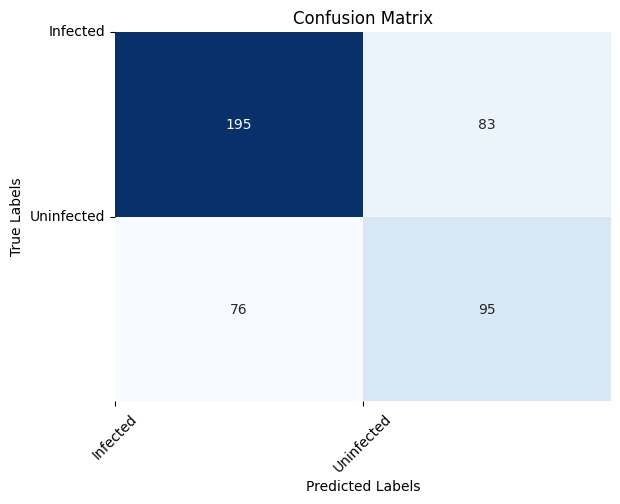

In [ ]:
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Customize the tick labels (optional)
class_names = ['Infected', 'Uninfected']  # Replace with your class names
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names, rotation =0)

plt.show()
